In [141]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [55]:
df = pd.read_csv('taylor_swift_spotify.csv')
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289


In [56]:
df = df.drop_duplicates(subset=['name'])
df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,4WUepByoeqcedHoYhSNHRt,spotify:track:4WUepByoeqcedHoYhSNHRt,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0108kcWLnn2HlH2kedi1gn,spotify:track:0108kcWLnn2HlH2kedi1gn,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,3Vpk1hfMAQme8VJ0SNRSkd,spotify:track:3Vpk1hfMAQme8VJ0SNRSkd,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,1OcSfkeCg9hRC2sFKB4IMJ,spotify:track:1OcSfkeCg9hRC2sFKB4IMJ,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,2k0ZEeAqzvYMcx9Qt5aClQ,spotify:track:2k0ZEeAqzvYMcx9Qt5aClQ,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289


In [57]:
len(df)

329

In [58]:
df.drop(['Unnamed: 0','uri','id'],axis=1,inplace=True)
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289


In [59]:
album_encoder = LabelEncoder()
df['encoded album'] = album_encoder.fit_transform(df.album)
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,79,212600,1
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,79,231833,1
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,80,231000,1
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,79,235800,1
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,78,193289,1


In [60]:
df = df.dropna()

In [61]:
len(df)

329

In [62]:
df.sort_values(by=['energy','loudness','popularity'],inplace=True)

In [63]:
df['encoded_song'] = [x for x in range(len(df))]

In [64]:
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album,encoded_song
408,State Of Grace - Acoustic,Red (Deluxe Edition),2012-10-22,22,0.664,0.626,0.118,0.000169,0.127,-15.910,0.0305,105.597,0.0682,41,323080,7,0
371,I Know Places - Voice Memo,1989 (Deluxe Edition),2014-10-27,17,0.829,0.592,0.128,0.000000,0.527,-17.932,0.5890,78.828,0.1500,46,216333,0,1
140,State Of Grace (Acoustic Version) (Taylor's Ve...,Red (Taylor's Version),2021-11-12,20,0.663,0.445,0.131,0.000002,0.108,-13.778,0.0564,208.918,0.1010,67,321640,8,2
308,New Year’s Day,reputation,2017-11-10,15,0.921,0.661,0.151,0.000000,0.130,-12.864,0.0354,94.922,0.2300,77,235466,15,3
241,hoax - the long pond studio sessions,folklore: the long pond studio sessions (from ...,2020-11-25,16,0.962,0.682,0.155,0.000000,0.180,-13.083,0.0394,118.832,0.4830,57,221800,14,4


In [65]:
df['name']

408                            State Of Grace - Acoustic
371                           I Know Places - Voice Memo
140    State Of Grace (Acoustic Version) (Taylor's Ve...
308                                       New Year’s Day
241                 hoax - the long pond studio sessions
                             ...                        
428                                     Mean - Live/2011
54                            Haunted (Taylor's Version)
450                                  Better Than Revenge
352                        I'm Only Me When I'm With You
326                                              Haunted
Name: name, Length: 329, dtype: object

In [66]:
label = dict(zip(df['encoded_song'], df['name']))

In [67]:
df.tail()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album,encoded_song
428,Mean - Live/2011,Speak Now World Tour Live,2010-10-25,4,0.15400,0.429,0.915,0.000000,0.6930,-4.373,0.0690,163.752,0.432,47,246373,11,324
54,Haunted (Taylor's Version),Speak Now (Taylor's Version),2023-07-07,12,0.00667,0.427,0.915,0.000000,0.2210,-1.909,0.0619,162.201,0.355,76,245413,10,325
450,Better Than Revenge,Speak Now (Deluxe Edition),2010-10-25,10,0.01390,0.516,0.917,0.000006,0.3600,-3.186,0.0827,145.821,0.635,61,217160,9,326
352,I'm Only Me When I'm With You,reputation Stadium Tour Surprise Song Playlist,2017-11-09,44,0.00454,0.556,0.933,0.000469,0.1010,-3.685,0.0720,143.936,0.521,34,215600,16,327
326,Haunted,reputation Stadium Tour Surprise Song Playlist,2017-11-09,18,0.06480,0.431,0.949,0.000000,0.0612,-2.622,0.0605,162.012,0.370,36,245413,16,328


In [68]:
df.release_date.dtype

dtype('O')

In [69]:
def age_calc(text):
    text = str(text)
    year = int(text.split('-')[0])
    age = 2024 - year
    return age

In [70]:
df['age'] = df.release_date.apply(lambda x : age_calc(x))
df.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album,encoded_song,age
408,State Of Grace - Acoustic,Red (Deluxe Edition),2012-10-22,22,0.664,0.626,0.118,0.000169,0.127,-15.910,0.0305,105.597,0.0682,41,323080,7,0,12
371,I Know Places - Voice Memo,1989 (Deluxe Edition),2014-10-27,17,0.829,0.592,0.128,0.000000,0.527,-17.932,0.5890,78.828,0.1500,46,216333,0,1,10
140,State Of Grace (Acoustic Version) (Taylor's Ve...,Red (Taylor's Version),2021-11-12,20,0.663,0.445,0.131,0.000002,0.108,-13.778,0.0564,208.918,0.1010,67,321640,8,2,3
308,New Year’s Day,reputation,2017-11-10,15,0.921,0.661,0.151,0.000000,0.130,-12.864,0.0354,94.922,0.2300,77,235466,15,3,7
241,hoax - the long pond studio sessions,folklore: the long pond studio sessions (from ...,2020-11-25,16,0.962,0.682,0.155,0.000000,0.180,-13.083,0.0394,118.832,0.4830,57,221800,14,4,4


In [71]:
df.drop(['track_number'],inplace=True,axis=1)

In [72]:
df.head()

,name,album,release_date,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album,encoded_song,age
408,State Of Grace - Acoustic,Red (Deluxe Edition),2012-10-22,0.664,0.626,0.118,0.000169,0.127,-15.910,0.0305,105.597,0.0682,41,323080,7,0,12
371,I Know Places - Voice Memo,1989 (Deluxe Edition),2014-10-27,0.829,0.592,0.128,0.000000,0.527,-17.932,0.5890,78.828,0.1500,46,216333,0,1,10
140,State Of Grace (Acoustic Version) (Taylor's Ve...,Red (Taylor's Version),2021-11-12,0.663,0.445,0.131,0.000002,0.108,-13.778,0.0564,208.918,0.1010,67,321640,8,2,3
308,New Year’s Day,reputation,2017-11-10,0.921,0.661,0.151,0.000000,0.130,-12.864,0.0354,94.922,0.2300,77,235466,15,3,7
241,hoax - the long pond studio sessions,folklore: the long pond studio sessions (from ...,2020-11-25,0.962,0.682,0.155,0.000000,0.180,-13.083,0.0394,118.832,0.4830,57,221800,14,4,4


In [73]:
sample = df.copy()

In [74]:
df.drop(['name','album'],inplace=True,axis=1)

In [75]:
df.drop(['release_date'],inplace=True,axis=1)

In [76]:
df.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album,encoded_song,age
acousticness,1.000000,-0.091647,-0.714601,0.134773,-0.103628,-0.703519,0.075656,-0.139451,-0.178414,-0.081635,-0.054633,0.161953,-0.694051,-0.094999
danceability,-0.091647,1.000000,-0.006989,-0.048523,-0.214794,-0.046941,0.180908,-0.251088,0.318409,0.114315,-0.313096,-0.099480,-0.011817,-0.135323
energy,-0.714601,-0.006989,1.000000,-0.063707,0.136258,0.788116,-0.107584,0.213832,0.465079,0.014409,-0.065951,-0.088293,0.989173,0.119702
instrumentalness,0.134773,-0.048523,-0.063707,1.000000,-0.041231,-0.164702,-0.020487,-0.001148,-0.051694,0.038993,-0.032516,0.012362,-0.064703,-0.076509
liveness,-0.103628,-0.214794,0.136258,-0.041231,1.000000,0.062709,0.097342,-0.019401,-0.106563,-0.191164,0.166911,0.008512,0.137407,0.335253
loudness,-0.703519,-0.046941,0.788116,-0.164702,0.062709,1.000000,-0.303405,0.155681,0.326809,-0.062712,0.063197,-0.030243,0.766031,0.235727
speechiness,0.075656,0.180908,-0.107584,-0.020487,0.097342,-0.303405,1.000000,0.019682,0.100004,0.043043,-0.317176,-0.186820,-0.089859,-0.010899
tempo,-0.139451,-0.251088,0.213832,-0.001148,-0.019401,0.155681,0.019682,1.000000,0.093764,0.006458,-0.002103,-0.062371,0.229525,0.056978
valence,-0.178414,0.318409,0.465079,-0.051694,-0.106563,0.326809,0.100004,0.093764,1.000000,-0.030884,-0.331923,-0.055991,0.480058,0.016153
popularity,-0.081635,0.114315,0.014409,0.038993,-0.191164,-0.062712,0.043043,0.006458,-0.030884,1.000000,-0.048775,-0.381134,0.004028,-0.576362


<Axes: >

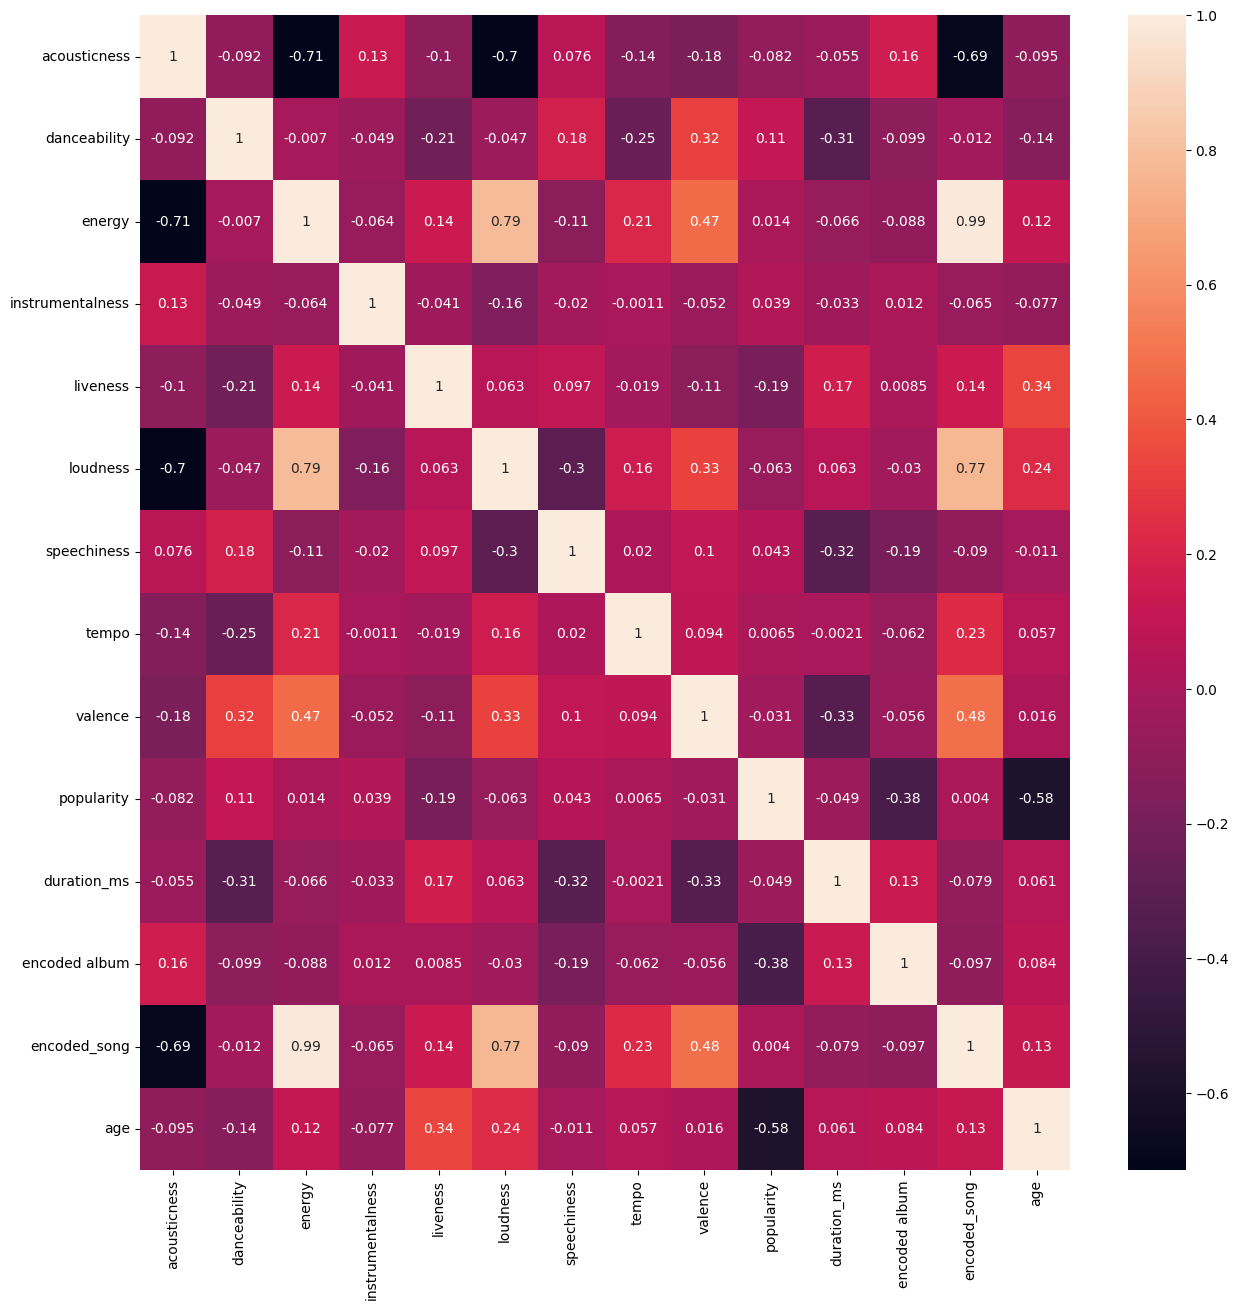

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [78]:
X = df.drop(['encoded_song'],axis=1)
y = df['encoded_song']
X,y

(     acousticness  danceability  energy  instrumentalness  liveness  loudness  \
 408       0.66400         0.626   0.118          0.000169    0.1270   -15.910   
 371       0.82900         0.592   0.128          0.000000    0.5270   -17.932   
 140       0.66300         0.445   0.131          0.000002    0.1080   -13.778   
 308       0.92100         0.661   0.151          0.000000    0.1300   -12.864   
 241       0.96200         0.682   0.155          0.000000    0.1800   -13.083   
 ..            ...           ...     ...               ...       ...       ...   
 428       0.15400         0.429   0.915          0.000000    0.6930    -4.373   
 54        0.00667         0.427   0.915          0.000000    0.2210    -1.909   
 450       0.01390         0.516   0.917          0.000006    0.3600    -3.186   
 352       0.00454         0.556   0.933          0.000469    0.1010    -3.685   
 326       0.06480         0.431   0.949          0.000000    0.0612    -2.622   
 
      speechin

In [79]:
X_numpy,y_numpy = np.array(X),np.array(y)
y_numpy = y_numpy.reshape(len(y_numpy),1)
X_numpy = np.stack(X_numpy)
X_numpy,y_numpy

(array([[6.64000e-01, 6.26000e-01, 1.18000e-01, ..., 3.23080e+05,
         7.00000e+00, 1.20000e+01],
        [8.29000e-01, 5.92000e-01, 1.28000e-01, ..., 2.16333e+05,
         0.00000e+00, 1.00000e+01],
        [6.63000e-01, 4.45000e-01, 1.31000e-01, ..., 3.21640e+05,
         8.00000e+00, 3.00000e+00],
        ...,
        [1.39000e-02, 5.16000e-01, 9.17000e-01, ..., 2.17160e+05,
         9.00000e+00, 1.40000e+01],
        [4.54000e-03, 5.56000e-01, 9.33000e-01, ..., 2.15600e+05,
         1.60000e+01, 7.00000e+00],
        [6.48000e-02, 4.31000e-01, 9.49000e-01, ..., 2.45413e+05,
         1.60000e+01, 7.00000e+00]]),
 array([[  0],
        [  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24]

In [80]:
X_scaler,y_scaler = MinMaxScaler(),MinMaxScaler()
X_scaled = X_scaler.fit_transform(X_numpy)
y_scaled = y_scaler.fit_transform(y_numpy)

In [81]:
Xtrain,Xtest,ytrain,ytest = train_test_split(
    X_scaled,
    y_scaled,
    test_size=0.2
)

In [82]:
model = DecisionTreeRegressor()

In [83]:
model.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [84]:
pred = model.predict(Xtest)
pred

array([0.79878049, 0.21036585, 0.60365854, 0.3445122 , 0.31097561,
       0.88109756, 0.3445122 , 0.0304878 , 0.58231707, 0.63414634,
       0.21341463, 0.86585366, 0.17073171, 0.84756098, 0.42987805,
       0.93902439, 0.07926829, 0.65853659, 0.01219512, 0.02134146,
       0.58231707, 0.39939024, 0.11890244, 0.2347561 , 0.77134146,
       0.99085366, 0.65853659, 0.27743902, 0.21341463, 0.48170732,
       0.5304878 , 0.40243902, 0.0152439 , 0.52439024, 0.02134146,
       0.44207317, 0.93902439, 0.9695122 , 0.39939024, 0.57012195,
       0.25      , 0.94512195, 0.18597561, 0.42378049, 0.4847561 ,
       0.07926829, 0.33536585, 0.88414634, 0.56097561, 0.52439024,
       0.27134146, 0.02134146, 0.84146341, 0.50914634, 0.2347561 ,
       0.42378049, 0.18902439, 0.93902439, 0.78963415, 0.27743902,
       0.12804878, 0.22256098, 0.72560976, 0.0152439 , 0.44512195,
       0.75914634])

In [85]:
mse = mean_squared_error(ytest,pred)
mae = mean_absolute_error(ytest,pred)
mse,mae

(8.351472788563805e-05, 0.0072524020694752405)

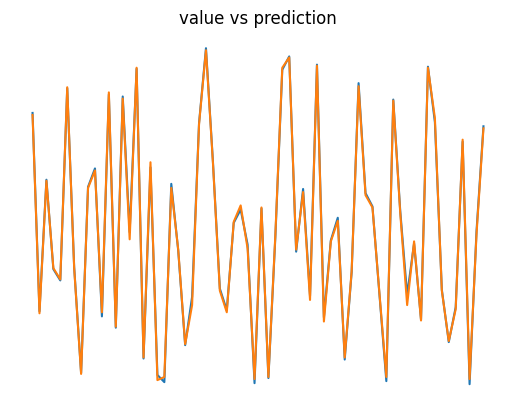

In [86]:
data_points = [x for x in range(len(ytest))]
plt.axis('off')
plt.plot(data_points,ytest)
plt.plot(data_points,pred)
plt.title('value vs prediction')
plt.show()

In [87]:
regressor = LinearRegression()

In [88]:
regressor.fit(Xtrain,ytrain)

LinearRegression()

In [89]:
r_pred = regressor.predict(Xtest)

In [90]:
mse = mean_squared_error(ytest,r_pred)
mae = mean_absolute_error(ytest,r_pred)
mse,mae

(0.00356831929527709, 0.04066412866305232)

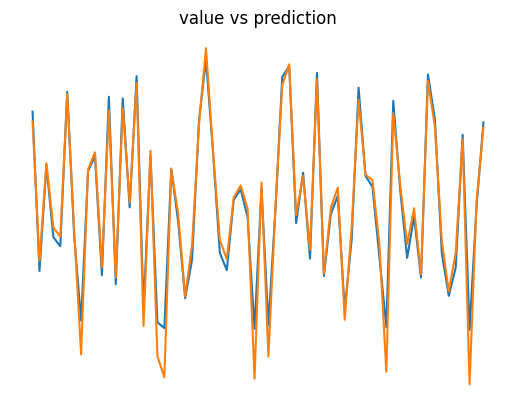

In [91]:
data_points = [x for x in range(len(ytest))]
plt.axis('off')
plt.plot(data_points,ytest)
plt.plot(data_points,r_pred)
plt.title('value vs prediction')
plt.show()

In [92]:
ans = model.predict([[0.683771,0.585627,0.000000,0.000515,0.101977,0.126194,0.007990,0.266296,0.033193,0.134328,0.452698,0.4375,0.647059]])
ans = y_scaler.inverse_transform(ans.reshape(-1, 1))
output = label[ans.item()]
output

'Forever & Always - Piano Version'

In [93]:
def prediciton(L):
    scaled = X_scaler.transform(np.array(L).reshape(1,-1))
    ans = model.predict(scaled)
    ans = y_scaler.inverse_transform(ans.reshape(-1, 1))
    output = label[np.round(ans.item())]
    return output,ans.item()

In [94]:
X.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album,age
408,0.664,0.626,0.118,0.000169,0.127,-15.910,0.0305,105.597,0.0682,41,323080,7,12
371,0.829,0.592,0.128,0.000000,0.527,-17.932,0.5890,78.828,0.1500,46,216333,0,10
140,0.663,0.445,0.131,0.000002,0.108,-13.778,0.0564,208.918,0.1010,67,321640,8,3
308,0.921,0.661,0.151,0.000000,0.130,-12.864,0.0354,94.922,0.2300,77,235466,15,7
241,0.962,0.682,0.155,0.000000,0.180,-13.083,0.0394,118.832,0.4830,57,221800,14,4


In [95]:
X.tail()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,encoded album,age
428,0.15400,0.429,0.915,0.000000,0.6930,-4.373,0.0690,163.752,0.432,47,246373,11,14
54,0.00667,0.427,0.915,0.000000,0.2210,-1.909,0.0619,162.201,0.355,76,245413,10,1
450,0.01390,0.516,0.917,0.000006,0.3600,-3.186,0.0827,145.821,0.635,61,217160,9,14
352,0.00454,0.556,0.933,0.000469,0.1010,-3.685,0.0720,143.936,0.521,34,215600,16,7
326,0.06480,0.431,0.949,0.000000,0.0612,-2.622,0.0605,162.012,0.370,36,245413,16,7


In [96]:
y.tail()

428    324
54     325
450    326
352    327
326    328
Name: encoded_song, dtype: int64

In [108]:
L = [0.15400,0.429,0.915,0.000000,0.6930,-4.373,0.0690,163.752,0.432,47,246373,11,14]
prediciton(L)

('Mean - Live/2011', 324.0)

In [104]:
joblib.dump(model, 'decisiontree.pkl')

['decisiontree.pkl']

In [105]:
joblib.dump(X_scaler, 'Xscaler.pkl')

['Xscaler.pkl']

In [106]:
joblib.dump(y_scaler, 'Yscaler.pkl')

['Yscaler.pkl']

In [107]:
joblib.dump(label, 'label_dict.pkl')

['label_dict.pkl']

In [116]:
#acousticness	danceability	energy	instrumentalness	liveness	loudness	speechiness	tempo	valence	popularity	duration_ms	encoded album	age